In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('Salary_dataset.csv')

# Convert to numpy array
x_train = data['YearsExperience'].to_numpy(dtype=float)   #features
y_train = data['Salary'].to_numpy(dtype=int)  # target values

In [3]:
length = len(x_train)    # length of the numpy array
print(f"Length of data: {length}")

Length of data: 30


In [4]:
# Set initial values for the weights and bias
w_initial = 1000
b_initial = 1000

In [5]:
# Function to calculate f_wb = w * x + b
def compute_f_wb(w, x, b):
    f_wb = (w * x) + b  # predicted values
    return f_wb

In [6]:
# Function to calculate the cost
def compute_cost(y, f_wb, length):
    cost = np.sum(np.square(f_wb - y)) / (2 * length)
    return cost

In [7]:
f_wb = compute_f_wb(w_initial, x_train, b_initial)
cost_initial = compute_cost(y_train, f_wb, length)  # initial cost
print(f"Initial cost: {cost_initial}")

Initial cost: 2715003225.5333333


In [8]:
# Function to draw the graph
def draw_function(x, y, f_wb):
    plt.plot(x, f_wb, label="Prediction", c='b')
    plt.scatter(x, y, label="Actual", marker='o', c='r')
    plt.title('Salary Data')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

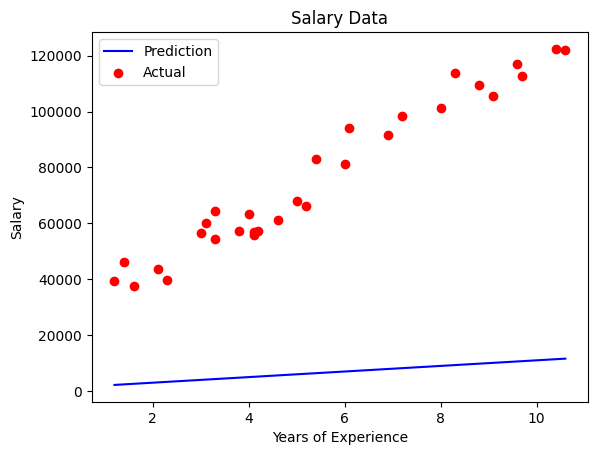

In [9]:
draw_function(x_train, y_train, f_wb)   # initial condition

In [10]:
# Function to calculate the gradient
def compute_gradient(x, y, f_wb, length):
    dj_dw = np.sum((f_wb - y) * x) / length
    dj_db = np.sum(f_wb - y) / length
    return dj_dw, dj_db

In [11]:
# Function to perform gradient descent
def gradient_descent(x, y, w, b, f_wb, length, alpha):
    number_of_iterations = 10000000
    for i in range(number_of_iterations):
        dj_dw, dj_db = compute_gradient(x, y, f_wb, length)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        f_wb = compute_f_wb(w, x, b)
    return w, b, f_wb

In [12]:
# Function to calculate the goodness of fit (R^2)
def compute_r2(y, f_wb):
    y_mean = np.mean(y)
    explained_variation = np.sum(np.square(f_wb - y_mean))
    total_variation = np.sum(np.square(y - y_mean))
    r = explained_variation / total_variation
    return r

w: 9449.962321455214, b: 24848.203966522262
The cost is: 15635475.861140464
Coefficient of Determination: 0.9569566641435363


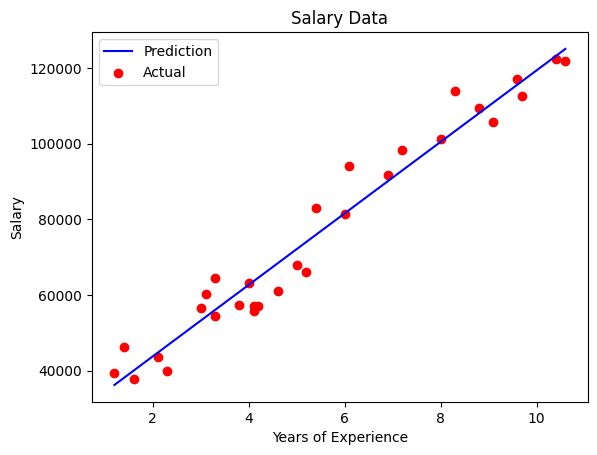

In [13]:
alpha = 0.01    # learning rate
w, b, f_wb = gradient_descent(x_train, y_train, w_initial, b_initial, f_wb, length, alpha)   # final values for the weights and bias
cost = compute_cost(y_train, f_wb, length)
r = compute_r2(y_train, f_wb)

print(f"w: {w}, b: {b}")
print(f"The cost is: {cost}")
print(f"Coefficient of Determination: {r}")

draw_function(x_train, y_train, f_wb)   # final condition

In [21]:
# Predict the values
years_of_experience = 11
predicted_salary = w * years_of_experience + b
print(f"Predicted Salary: {predicted_salary}")

Predicted Salary: 128797.7895025296
